In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
%matplotlib inline

In [2]:
def create_seed_from_email(email_str):
  running_total = 0
  for char in email_str:
    running_total += ord(char)
  return running_total
## TODO: Change the email below to your gradescope email to create your seed
seed = create_seed_from_email("oajao3@gatech.edu")
seed

1621

In [3]:
# Load the Clamp Data File CLAMP
data = pd.read_csv("ClaMP_Raw-51842.csv")
data.fillna(0)

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,...,1194954,3,64,1048576,4096,1048576,4096,0,16,0
1,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,1048576,4096,1048576,4096,0,16,0
2,23117,144,3,0,4,0,65535,0,184,0,...,67688,2,320,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,...,113668,2,1344,1048576,4096,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,...,69089,2,33088,262144,8192,1048576,4096,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,29360128,36864,28311552,12288,0,16,1
3326,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,3145728,12288,23068672,36864,0,16,1
3327,23117,144,3,0,4,0,65535,0,184,0,...,78801,2,32768,1048576,4096,1048576,4096,0,16,1
3328,23117,144,3,0,4,0,65535,0,184,0,...,120490,2,0,1048576,4096,1048576,4096,0,16,1


In [4]:
# This displays the top 5 Records
display(data.head(5))

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,...,1194954,3,64,1048576,4096,1048576,4096,0,16,0
1,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,1048576,4096,1048576,4096,0,16,0
2,23117,144,3,0,4,0,65535,0,184,0,...,67688,2,320,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,...,113668,2,1344,1048576,4096,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,...,69089,2,33088,262144,8192,1048576,4096,0,16,0


In [5]:
# This displays the bottom 5 Records
display(data.tail(5))

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
3325,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,29360128,36864,28311552,12288,0,16,1
3326,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,3145728,12288,23068672,36864,0,16,1
3327,23117,144,3,0,4,0,65535,0,184,0,...,78801,2,32768,1048576,4096,1048576,4096,0,16,1
3328,23117,144,3,0,4,0,65535,0,184,0,...,120490,2,0,1048576,4096,1048576,4096,0,16,1
3329,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,4194304,16384,19922944,4096,0,16,1


# Data Exploration

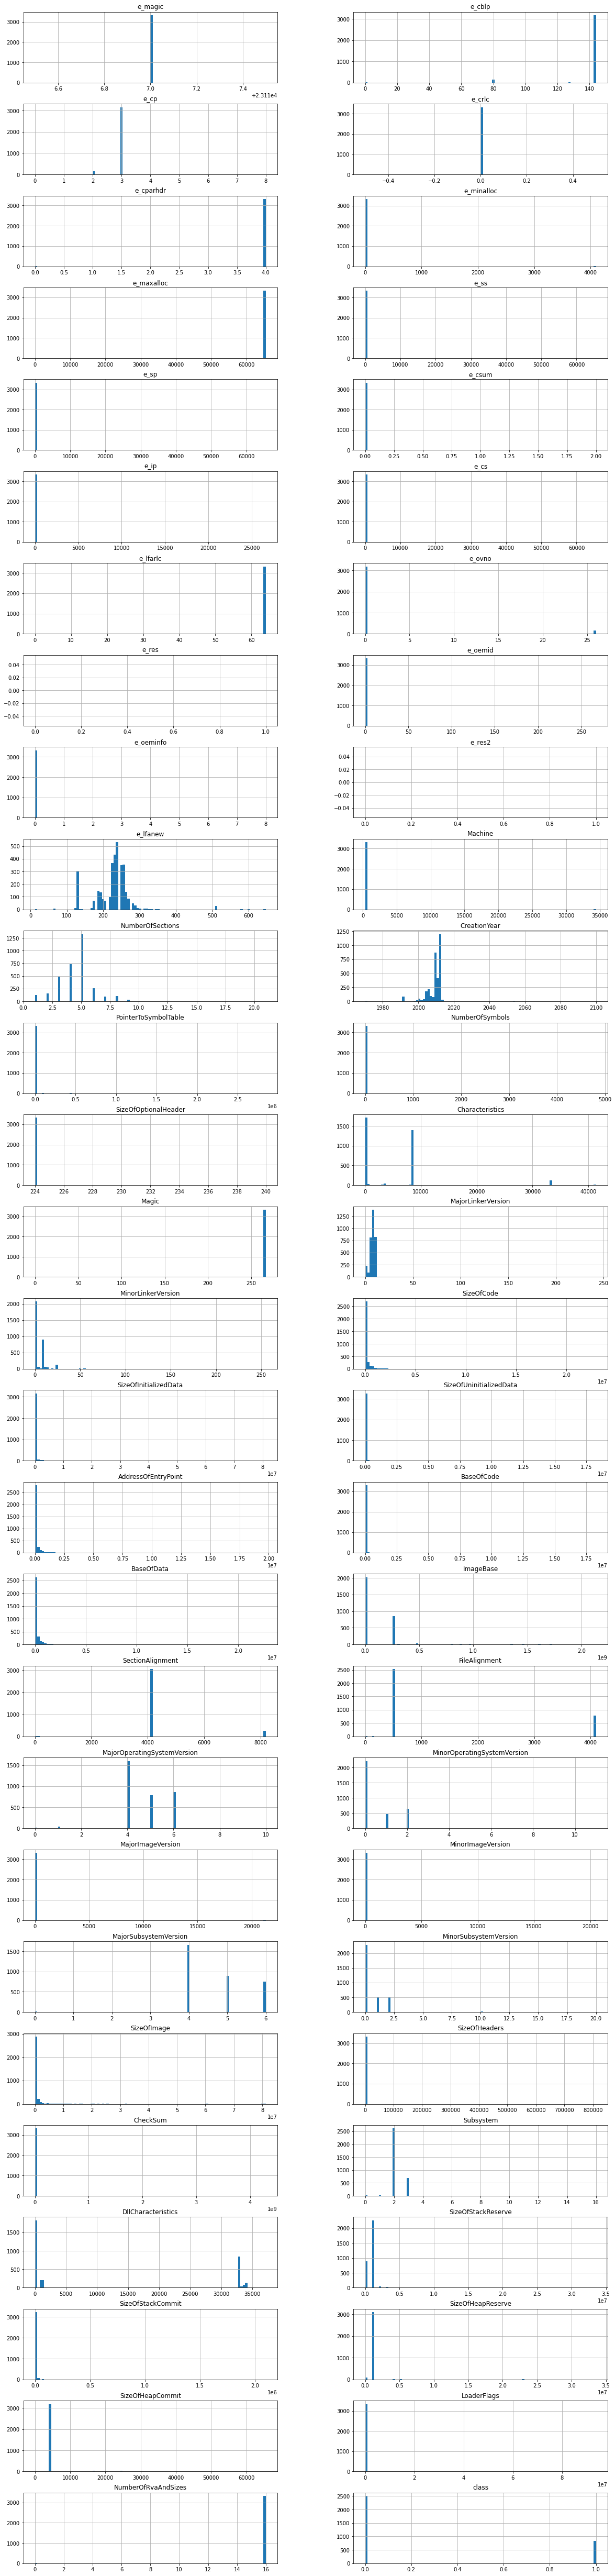

In [6]:
#Display the distribution of the dataset (Note: that the last column from this dataset, 'Class', will be our target label)
columns =data.columns.values.tolist()
data[columns].hist(stacked=False, bins=100, figsize=(20,180), layout=(56,2));

In [7]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.0 MB)
  Preparing metadata (setup.py) ... done

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [8]:
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(data, minimal=True)

In [10]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Quick look into the dataset metrics
data.shape

(3330, 56)

In [12]:
#Total number of records
n_records = len(data['class'])
print(n_records)

#OR
#n_records = data.shape[0]
#print(n_records)

3330


In [13]:
#Number of records where malware was not detected
n_non_malware =data['class'].value_counts()[0]
print(n_non_malware)

#OR
#n_non_malware = data[data["class"]==0].shape[0]
#print(n_non_malware)

2501


In [14]:
#Number of records where where malware was detected
n_malware = data['class'].value_counts()[1]
print(n_malware)

#OR
#n_malware = data[data["class"]== 1].shape[0]
#print(n_malware)

829


In [15]:
data['class'].value_counts()

0    2501
1     829
Name: class, dtype: int64

In [16]:
# Percentage of instances of malware
greater_percent = (data['class'].value_counts()/len(data)*100)
print(greater_percent) 

0    75.105105
1    24.894895
Name: class, dtype: float64


<AxesSubplot:>

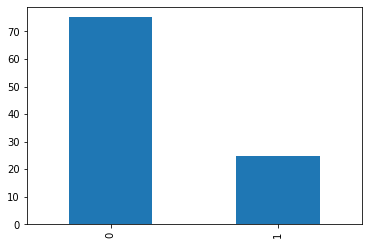

In [17]:
#grapgh showing the greater percentage between 0 (malware was not detected) and 1 (malware was detected)
greater_percent.plot(kind='bar')

<AxesSubplot:ylabel='class'>

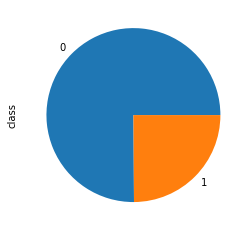

In [18]:
#grapgh showing the greater percentage between 0 (malware was not detected) and 1 (malware was detected)
greater_percent.plot(kind='pie')

In [19]:
greater_percent = 100*n_non_malware/n_records
print(greater_percent)

75.10510510510511


In [20]:
section_1 = {    
    "n_records": n_records,
    "n_non_malware": n_non_malware,
    "n_malware": n_malware,
    "greater_percent": greater_percent
    }

In [21]:
print(section_1)

{'n_records': 3330, 'n_non_malware': 2501, 'n_malware': 829, 'greater_percent': 75.10510510510511}


In [ ]:
import json

all_sections = {**section_1}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

In [ ]:
# Checking for the datatype in the dataset
data_types = data.dtypes
print(data_types)

In [ ]:
# Get the data types from the dataset and return a count in unique_data_types
unique_data_types = len(data.dtypes.unique())
print("There are {} unique data types".format(unique_data_types))

# Feature set

## Determining Feature Classifications

In [ ]:
print(len(data.columns))
data.columns

In [32]:
drop_features = ["e_magic","e_crlc","e_res","e_res2"]
numerical_features = ["e_cblp","e_cp","e_cparhdr","e_minalloc","e_maxalloc","e_ss","e_sp","e_ip","e_cs","e_lfarlc","e_ovno","e_lfanew",
                      "NumberOfSections","CreationYear","PointerToSymbolTable","NumberOfSymbols","SizeOfOptionalHeader",
                      "SizeOfCode","SizeOfInitializedData","SizeOfUninitializedData","AddressOfEntryPoint","BaseOfCode","BaseOfData",
                      "ImageBase","SectionAlignment","FileAlignment",
                      "SizeOfImage","SizeOfHeaders","SizeOfStackReserve","SizeOfStackCommit","SizeOfHeapReserve",
                      "SizeOfHeapCommit","NumberOfRvaAndSizes"
                      ]
categorical_features = ["e_csum","e_oemid","e_oeminfo","Machine","Characteristics","Magic","CheckSum","DllCharacteristics",
                        "LoaderFlags","Subsystem","MajorOperatingSystemVersion",
                      "MinorOperatingSystemVersion","MajorImageVersion","MinorImageVersion","MajorSubsystemVersion","MinorSubsystemVersion",
                      "MajorLinkerVersion","MinorLinkerVersion"]

print("You have categorized {} of 55 features".format(len(drop_features)+len(numerical_features)+len(categorical_features)))

You have categorized 55 of 55 features


In [33]:
drop_feature_count = len(drop_features)
numerical_feature_count = len(numerical_features)
categorical_feature_count = len(categorical_features)

# Preparing the Data

In [34]:
# Split the data into features (dataframe with numerical and categorical features) and target label (pandas series with target column)

Target = data['class']
features_raw = data.drop(drop_features + ['class'], axis = 1)

In [35]:
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()

# create a dataframe with the scaled values of the features and with the same column names they had before
num_features_scaled = pd.DataFrame(scaler.fit_transform(features_raw[numerical_features]), columns=features_raw[numerical_features].columns)

# Show an example of the first 5 record with scaling applied
num_features_scaled.head()

,e_cblp,e_cp,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_ip,e_cs,e_lfarlc,...,ImageBase,SectionAlignment,FileAlignment,SizeOfImage,SizeOfHeaders,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,NumberOfRvaAndSizes
0,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0.555334,0.5,0.125,0.016434,0.001263,0.031250,0.001953,0.03125,0.0625,1.0
1,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0.125810,0.5,0.125,0.000252,0.001263,0.031250,0.001953,0.03125,0.0625,1.0
2,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0.125810,0.5,0.125,0.000756,0.001263,0.031250,0.001953,0.03125,0.0625,1.0
3,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0.125810,0.5,0.125,0.001159,0.000631,0.031250,0.001953,0.03125,0.0625,1.0
4,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0.001966,0.5,0.125,0.000706,0.001263,0.007812,0.003906,0.03125,0.0625,1.0


# Implementation: Data Preprocessing One Hot Encoding 

In [36]:
cat_features_raw = features_raw[categorical_features].copy()
for col in categorical_features:
  cat_features_raw[col] = cat_features_raw[col].astype("category") #setting each feature as type category

In [37]:
# Given what you know about the data do you think our dataset will gain any usability by one hot encoding columns? (return either "yes" or "no")
one_hot_encoding = 'yes'

# If you answered yes then use pandas get_dummies function and drop the first category
cat_features_final = pd.get_dummies(cat_features_raw, drop_first=True)

# Print the number of categorical features after one-hot encoding
num_features_encoded_all = cat_features_final.shape[1]
print("{} total features after one-hot encoding.".format(num_features_encoded_all))


2738 total features after one-hot encoding.


In [38]:
# select categorical features from the dataset and set them as a category
cat_features_raw = features_raw[list(set(categorical_features)-set(["SizeOfCode","SizeOfInitializedData","AddressOfEntryPoint","BaseOfData","ImageBase","SizeOfImage","CheckSum"]))].copy()
for col in list(set(categorical_features)-set(["SizeOfCode","SizeOfInitializedData","AddressOfEntryPoint","BaseOfData","ImageBase","SizeOfImage","CheckSum"])):
                cat_features_raw[col] = cat_features_raw[col].astype("category")
# one hot encode the features and drop the first category
cat_features_final = pd.get_dummies(cat_features_raw, drop_first=True)

# Print the number of categorical features after one-hot encoding (with CheckSum removed)
num_features_encoded_final = cat_features_final.shape[1]
print("{} total features after one-hot encoding.".format(num_features_encoded_final))

183 total features after one-hot encoding.


# Joining Data

In [39]:
# This combines and cleans the data and removes any nan values
features_final = pd.concat([num_features_scaled,cat_features_final],axis=1)

features_final = features_final.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
display(features_final.head(5))

,e_cblp,e_cp,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_ip,e_cs,e_lfarlc,...,MinorImageVersion_20512,e_csum_1,e_csum_2,Machine_448,Machine_34404,MajorSubsystemVersion_1,MajorSubsystemVersion_3,MajorSubsystemVersion_4,MajorSubsystemVersion_5,MajorSubsystemVersion_6
0,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1


#  Train/Test Dataset Split

In [40]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'Target' data into training and testing sets using a train set that is 80% of the data and a random state of np.random.RandomState(seed)
X_train, X_test, y_train, y_test = train_test_split(features_final, Target, test_size=0.2, random_state=np.random.RandomState(seed))

n_train_records = X_train.shape[0]
n_test_records = X_test.shape[0]

# Show the results of the split
print("Training set has {} samples.".format(n_train_records))
print("Testing set has {} samples.".format(n_test_records))

Training set has 2664 samples.
Testing set has 666 samples.


In [41]:
section_2 = {    
    "unique_data_types": unique_data_types,
    "drop_feature_count":drop_feature_count,
    "numerical_feature_count":numerical_feature_count,
    "categorical_feature_count":categorical_feature_count,
    "one_hot_encoding": one_hot_encoding,
    "num_features_encoded_all": num_features_encoded_all,
    "num_features_encoded_final":num_features_encoded_final,
    "n_train_records": n_train_records,
    "n_test_records": n_test_records
    }

NameError: name 'unique_data_types' is not defined

In [ ]:
all_sections = {**section_1,**section_2}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

# Section 3: Creating Models on the Data

# Evaluate the Naive Predictor Performace

In [43]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
# you can read up more on each of these sklearn metrics here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics 

#TODO: Calculate accuracy, precision, recall and F-Score for the Test Data assuming the model predicts every sample is NOT malware 

naive_accuracy = accuracy_score(y_test,[1]*len(y_test))
naive_recall = recall_score(y_test,[1]*len(y_test))
naive_precision = precision_score(y_test,[1]*len(y_test))
naive_fscore = f1_score(y_test,[1]*len(y_test))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, Recall: {:.4f}, Precision: {:.4f}, F-score: {:.4f}]".format(naive_accuracy, naive_recall, naive_precision, naive_fscore))

Naive Predictor: [Accuracy score: 0.2327, Recall: 1.0000, Precision: 0.2327, F-score: 0.3776]


In [44]:
section_3 = {
    "naive_accuracy": round(naive_accuracy,4),
    "naive_recall": round(naive_recall,4),
    "naive_precision": round(naive_precision,4),
    "naive_fscore": round(naive_fscore,4),
}

In [ ]:
all_sections = {**section_1,**section_2,**section_3}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

## Section 3.1: Supervised Learning Models

### Logistic Regression

In [46]:
#Initialize Model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=np.random.RandomState(seed),penalty='l2', max_iter=1000)

In [47]:
#Train Model
logreg.fit(X_train,y_train)
pred_binary = logreg.predict(X_test)
predicted_probas = logreg.predict_proba(X_test)

In [48]:
from sklearn.metrics import auc,roc_curve
logreg_accuracy = 0 
logreg_recall = 0
logreg_precision = 0
logreg_fscore = 0
logreg_roc_auc = 0

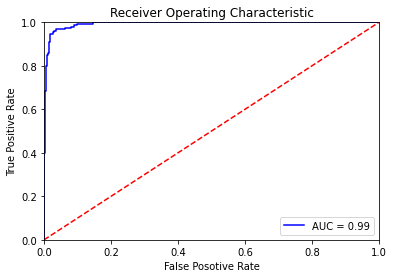

In [49]:
from sklearn.metrics import roc_curve, auc
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#MethodI: plt
import matplotlib.pyplot as plt
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Posotive Rate')
plt.show()

In [50]:
from sklearn.feature_selection import RFE
selector = RFE(logreg, n_features_to_select=5, step=1)
selector = selector.fit(X_train,y_train)

importance_df = pd.DataFrame({"ranking":selector.ranking_, "col_name":X_train.columns,
                             "coef":selector.estimator.coef_[0], "absolute_val_coef":list(map(abs, selector.estimator.coef_[0]))
                             }).sort_values(["ranking","absolute_val_coef"], ascending=[True,False]).reset_index(drop=True)

In [51]:
importance_df

,ranking,col_name,coef,absolute_val_coef
0,1,DllCharacteristics_33088,-3.502553,3.502553
1,1,e_lfanew,-3.344506,3.344506
2,1,ImageBase,-2.188536,2.188536
3,1,SectionAlignment,-2.104434,2.104434
4,1,SizeOfHeapReserve,0.947202,0.947202
...,...,...,...,...
211,208,MinorImageVersion_1266,0.000000,0.000000
212,209,LoaderFlags_93827511,0.000000,0.000000
213,210,MinorImageVersion_19,0.000000,0.000000
214,211,MinorImageVersion_60,0.000000,0.000000


In [52]:
logreg_top_feature_name = importance_df["col_name"][0]
logreg_top_feature_relative_importance = importance_df["coef"][0]
logreg_second_feature_name = importance_df["col_name"][1]
logreg_second_feature_relative_importance = importance_df["coef"][1]
logreg_third_feature_name = importance_df["col_name"][2]
logreg_third_feature_relative_importance = importance_df["coef"][2]
logreg_fourth_feature_name = importance_df["col_name"][3]
logreg_fourth_feature_relative_importance = importance_df["coef"][3]
logreg_fifth_feature_name = importance_df["col_name"][4]
logreg_fifth_feature_relative_importance = importance_df["coef"][4]

In [53]:
section_3_1_1 = {
    "logreg_accuracy": round(logreg_accuracy,4),
    "logreg_recall": round(logreg_recall,4),
    "logreg_precision": round(logreg_precision,4),
    "logreg_fscore": round(logreg_fscore,4),
    "logreg_roc_auc": round(logreg_roc_auc,4),
    "logreg_top_feature_name" : logreg_top_feature_name,
    "logreg_top_feature_relative_importance" : logreg_top_feature_relative_importance,
    "logreg_second_feature_name" : logreg_second_feature_name,
    "logreg_second_feature_relative_importance" : logreg_second_feature_relative_importance,
    "logreg_third_feature_name" : logreg_third_feature_name,
    "logreg_third_feature_relative_importance" : logreg_third_feature_relative_importance,
    "logreg_fourth_feature_name" : logreg_fourth_feature_name,
    "logreg_fourth_feature_relative_importance" : logreg_fourth_feature_relative_importance,
    "logreg_fifth_feature_name" : logreg_fifth_feature_name,
    "logreg_fifth_feature_relative_importance" : logreg_fifth_feature_relative_importance
}

In [ ]:
all_sections = {**section_1,**section_2,**section_3,**section_3_1_1}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

# Section 3.1.2: Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
random_forest =RandomForestClassifier(n_estimators=5000, max_features="sqrt", random_state=seed, criterion='entropy')

In [55]:
# Train Model
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=5000, random_state=1621)

In [56]:
# Analyze Model Results
random_forest_accuracy = accuracy_score(y_test,random_forest.predict(X_test))
random_forest_recall = recall_score(y_test,random_forest.predict(X_test))
random_forest_precision = precision_score(y_test,random_forest.predict(X_test))
random_forest_fscore = f1_score(y_test,random_forest.predict(X_test))
random_forest_roc_auc = roc_auc_score(y_test,random_forest.predict_proba(X_test)[:,1])

In [57]:
#Find the Feature Importance of the Model
feature_importances = pd.DataFrame(random_forest.feature_importances_, index =X_train.columns,  columns=['importance']).sort_values('importance', ascending=False)

In [58]:
feature_importances.head()

,importance
ImageBase,0.094969
AddressOfEntryPoint,0.054838
Characteristics_271,0.053386
Characteristics_8450,0.044868
e_lfanew,0.040436


In [59]:
random_forest_top_feature_name = "ImageBase"
random_forest_top_feature_relative_importance = 0.091929 
random_forest_second_feature_name ="Characteristics_271" 
random_forest_second_feature_relative_importance = 0.057623
random_forest_third_feature_name = "AddressOfEntryPoint"
random_forest_third_feature_relative_importance =0.053480 
random_forest_fourth_feature_name ="Characteristics_8450" 
random_forest_fourth_feature_relative_importance =0.045261 
random_forest_fifth_feature_name = "e_lfanew" 
random_forest_fifth_feature_relative_importance = 0.040202

In [60]:
section_3_1_2 = {
    "random_forest_accuracy": round(random_forest_accuracy,4),
    "random_forest_recall": round(random_forest_recall,4),
    "random_forest_precision": round(random_forest_precision,4),
    "random_forest_fscore": round(random_forest_fscore,4),
    "random_forest_roc_auc": round(random_forest_roc_auc,4),
    "random_forest_top_feature_name" : random_forest_top_feature_name,
    "random_forest_top_feature_relative_importance" : random_forest_top_feature_relative_importance,
    "random_forest_second_feature_name" : random_forest_second_feature_name,
    "random_forest_second_feature_relative_importance" : random_forest_second_feature_relative_importance,
    "random_forest_third_feature_name" : random_forest_third_feature_name,
    "random_forest_third_feature_relative_importance" : random_forest_third_feature_relative_importance,
    "random_forest_fourth_feature_name" : random_forest_fourth_feature_name,
    "random_forest_fourth_feature_relative_importance" : random_forest_fourth_feature_relative_importance,
    "random_forest_fifth_feature_name" : random_forest_fifth_feature_name,
    "random_forest_fifth_feature_relative_importance" : random_forest_fifth_feature_relative_importance
}

In [ ]:
all_sections = {**section_1, **section_2, **section_3, **section_3_1_1, **section_3_1_2}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

# Section 3.1.3: Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gradient = GradientBoostingClassifier(random_state=seed, learning_rate=0.1, max_depth=3, n_estimators=100)#TODO

In [62]:
# Train Model
gradient.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1621)

In [63]:
# Analyze Model Results
gradient_accuracy = accuracy_score(y_test,gradient.predict(X_test))
gradient_recall = recall_score(y_test,gradient.predict(X_test))
gradient_precision = precision_score(y_test,gradient.predict(X_test))
gradient_fscore = f1_score(y_test,gradient.predict(X_test))
gradient_roc_auc = roc_auc_score(y_test,gradient.predict_proba(X_test)[:,1])

In [64]:
# Find the Feature Importance of the Model

gfeature_importances = pd.DataFrame(gradient.feature_importances_, index =X_train.columns,  columns=['importance']).sort_values('importance', ascending=False)

In [65]:
gfeature_importances.head()

,importance
Characteristics_271,0.288329
ImageBase,0.130920
CreationYear,0.097840
Subsystem_2,0.073659
MajorImageVersion_6,0.055038


In [66]:
gfeature_importances['importance'][0]

0.28832930903792675

In [67]:
gradient_top_feature_name = "Characteristics_271"
gradient_top_feature_relative_importance = gfeature_importances['importance'][0]
gradient_second_feature_name ="ImageBase"
gradient_second_feature_relative_importance =gfeature_importances['importance'][1]
gradient_third_feature_name ="CreationYear"
gradient_third_feature_relative_importance = gfeature_importances['importance'][2]
gradient_fourth_feature_name ="MajorImageVersion_6"
gradient_fourth_feature_relative_importance =gfeature_importances['importance'][3]
gradient_fifth_feature_name ="Subsystem_2"
gradient_fifth_feature_relative_importance =gfeature_importances['importance'][4]

In [68]:
section_3_1_3 = {
    "gradient_accuracy": gradient_accuracy,
    "gradient_recall": gradient_recall,
    "gradient_precision": gradient_precision,
    "gradient_fscore": gradient_fscore,
    "gradient_roc_auc": gradient_roc_auc,
    "gradient_top_feature_name" : gradient_top_feature_name,
    "gradient_top_feature_relative_importance" : gradient_top_feature_relative_importance,
    "gradient_second_feature_name" : gradient_second_feature_name,
    "gradient_second_feature_relative_importance" : gradient_second_feature_relative_importance,
    "gradient_third_feature_name" : gradient_third_feature_name,
    "gradient_third_feature_relative_importance" : gradient_third_feature_relative_importance,
    "gradient_fourth_feature_name" : gradient_fourth_feature_name,
    "gradient_fourth_feature_relative_importance" : gradient_fourth_feature_relative_importance,
    "gradient_fifth_feature_name" : gradient_fifth_feature_name,
    "gradient_fifth_feature_relative_importance" : gradient_fifth_feature_relative_importance
}

In [ ]:
all_sections = {**section_1, **section_2, **section_3, **section_3_1_1, **section_3_1_2, **section_3_1_3}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

# Section 3.2: Unsupervised Machine Learning

## Section 3.2.1: Elbow method k means python

In [69]:
from sklearn.cluster import KMeans
#Train a different kmeans model for each value of k using the train dataset and log the SSE score for each k
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 0, n_init=10)
    kmeans.fit(X_train)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    



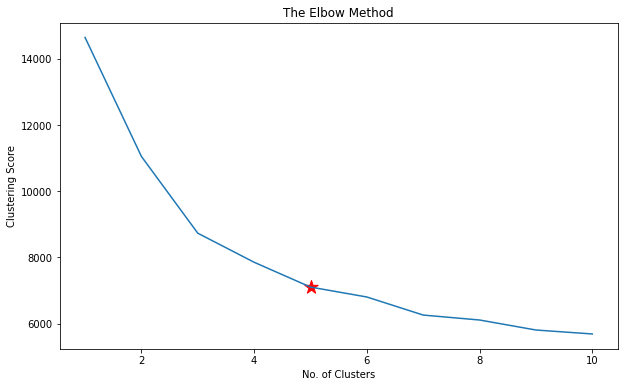

In [70]:
#Plot Cluster SSE scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [71]:
from sklearn.metrics import silhouette_score 
kmeans_n_clusters = 5 #Determine the optimal value of k from ELBOW plot 

# fit kmeans model using this optimal value of k
kmeans = KMeans(n_clusters=kmeans_n_clusters, random_state=0)


# Predict the cluster for each data point in the train and test datasets

train_preds = kmeans.labels_ 
test_preds = kmeans.predict(X_test)

# Given what you know about the data do you think our dataset will gain any usability by one hot encoding columns? 
# if so use the get_dummies without dropping the first feature this time
# and Add pred clusters to new versions of the train and test datasets you should use data_frame.copy()
# Name this cluster feature kmeans_cluster_id


kmeans_one_hot_encoding = "yes"  pd.get_dummies(cat_features_raw, drop_first=True)

kmeans_train = X_train
kmeans_test = X_test

# Calculate the mean silhouette coefficient for the number of clusters chosen
kmeans_optimal_sse_score = silhouette_avg.append(silhouette_score(data_frame, cluster_labels))plt.plot(range_n_clusters,silhouette_avg,’bx-’)

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data_frame)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 
plt.xlabel(‘Values of K’) 
plt.ylabel(‘Silhouette score’) 
plt.title(‘Silhouette analysis For Optimal k’)
plt.show()



SyntaxError: invalid syntax (2238108356.py, line 25)

In [ ]:
section_3_2_1 = {
    "kmeans_n_clusters": kmeans_n_clusters,
    "kmeans_one_hot_encoding":kmeans_one_hot_encoding,
    "kmeans_optimal_sse_score": kmeans_optimal_sse_score
}